In [2]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt


df_player_of_the_week = pd.read_csv('NBA_player_of_the_week_last.csv')

#### Get the first player of the week appearance of each player

In [3]:
df_player_of_the_week['Date'] = pd.to_datetime(df_player_of_the_week.Date)
first_win = df_player_of_the_week.groupby('Player')['Date'].agg(['first'])
first_win.reset_index(level=0,inplace=True)
# show dataframe content and num of rows
first_win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 2 columns):
Player    274 non-null object
first     274 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 3.2+ KB


#### Attach details for each player

In [4]:
first_win_full_df = pd.merge(first_win, df_player_of_the_week, how='inner', left_on=['Player','first'], right_on=['Player','Date'])

first_win_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 273
Data columns (total 14 columns):
Player               274 non-null object
first                274 non-null datetime64[ns]
Age                  274 non-null int64
Conference           145 non-null object
Date                 274 non-null datetime64[ns]
Draft Year           274 non-null int64
Height               274 non-null object
Position             274 non-null object
Season               274 non-null object
Season short         274 non-null int64
Seasons in league    274 non-null int64
Team                 274 non-null object
Weight               274 non-null object
Real_value           274 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memory usage: 24.6+ KB


#### Q. At which career atage players win the title for the first time

<IPython.core.display.Javascript object>


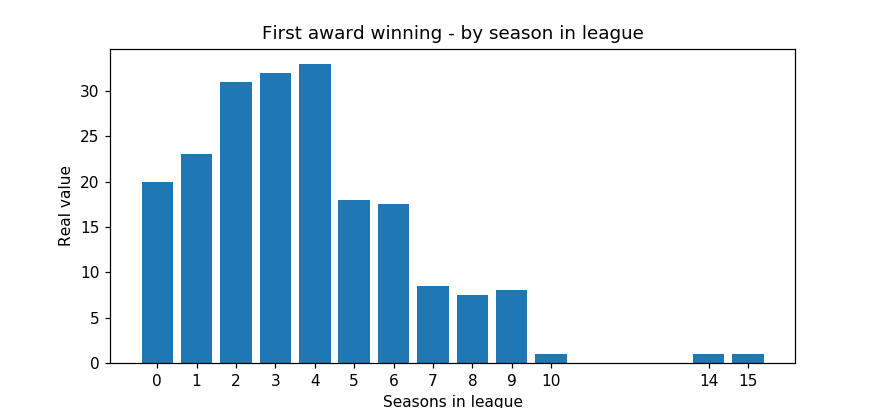

In [5]:
df_first_time_by_seasons_in_leg = first_win_full_df.groupby(['Seasons in league'])['Real_value'].sum().reset_index()
plt.figure(figsize=(8,3.7))
plt.bar(pd.to_numeric(df_first_time_by_seasons_in_leg['Seasons in league']),df_first_time_by_seasons_in_leg['Real_value'])
plt.xticks(pd.to_numeric(df_first_time_by_seasons_in_leg['Seasons in league']))
plt.xlabel('Seasons in league')
plt.ylabel('Real value')
plt.title('First award winning - by season in league')

##### A. Most of the players winning the title after 2-4 full season.
##### Interesthing thing is that we have several players that won for the first time after 14-15 yeqars in league

In [13]:
# checking out who won after that period of the time for the first time.
first_win_full_df[['Player','Seasons in league','Season short']].sort_values(by=['Seasons in league'],ascending=False).head(4)

,Player,Seasons in league,Season short
139,Kareem Abdul-Jabbar,15,1985
137,Julius Erving,14,1987
2,Al Harrington,10,2009
244,Stephen Jackson,10,2008
225,Robert Parish,9,1987


##### we can say that Kareen and Dr. J, won the title at late stage of their career mainly because the title started at 84-85.